In [1]:
import grunn
import pandas as pd
import matplotlib.pyplot as plt

# Setningsberekning for pumpestasjon i Vågen.


### Grunnlag
Boringer utført med fjellborerigg, registert dybder med løsmasse fra tolking av boringer som forklart under.

![Plan](plan.png)

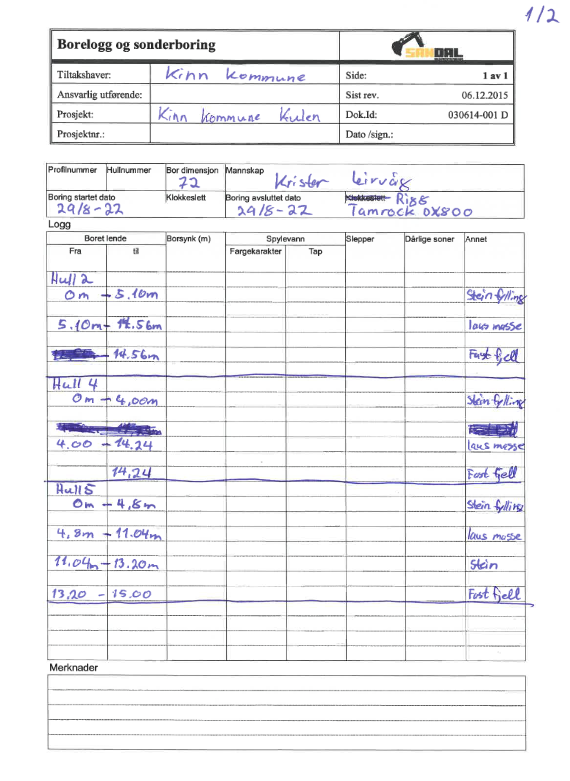
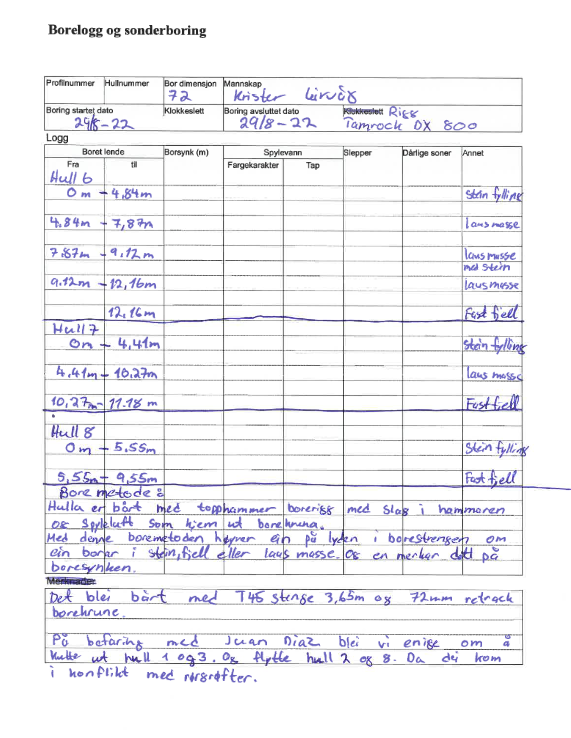

In [2]:
hull = {
    "hull2":round(14.65-5.1,2),
    "hull4":round(14.24-4,2),
    "hull5":round(11.4-4.8,2),
    "hull6":round(12.16-4.84,2),
    "hull7":round(10.27-4.41,2),
}

for hullnr, dybde in hull.items():
    print(f'{hullnr} : {dybde} m')

hull2 : 9.55 m
hull4 : 10.24 m
hull5 : 6.6 m
hull6 : 7.32 m
hull7 : 5.86 m


Det ser ut til å vere mellom 4 og 5 meter oppfylling med stein, samt at topp boringer er utført på omlag kote 2.2. Det er stor forksjell på sjøkartnull og normalnull i området og middelvann ligger på omtrent 119 cm. Reknar da i snitt 1 meter fylling over sjø, og 3 meter under.

In [3]:
#Settter grunnvannsnivå til "terreng"
u = 0
#Setter last med 4 meter oppfylling, delvis neddykka
q = (1*19)+(3*9)


Rekner ut setninger med "uendelig" utsrekning på oppfylling. Gir konservativ og litt høgt resultat, men andre usikkerheter er så store. Oppfylling er uansett stor i forhold til lagmektighet.
Rekner ut for forskjellige verdier av setiningsmodul, da denne er ukjent, vil lenger det sammenligne mot Insar data for vudere reelt tall.

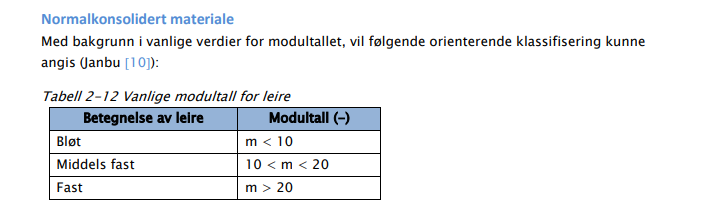

In [12]:
lagliste = {}
for key, value in hull.items():
    lagliste[key]= grunn.JordLag("Leire", int(value*100), 17)

for m in range(5, 21, 5):
    print('')
    print(f'Ved m = {m}')
    for hullnr, lag in lagliste.items():
        lag.sett_stivhet(m=m)
        
    #profil = []
    #for key, value in lagliste.items():
        #profil.append(grunn.JordProfil([value], u))
        temp_profil = grunn.JordProfil([lag], u)

    #for pro in profil:
        temp_profil.setning_uendelig(q)
        print(f'Setning for {hullnr} som har lagdybde på {lag.mektighet/100} m = {int(temp_profil.total_setning()*100)} cm')
print('')
for hullnr, lag in lagliste.items():
    print('')
    print(f'Posisjon: {hullnr}')
    print(f'Tid for primærkonsolidering "best case": {round(lag.primerkonsolidering_tid(10),1)} år')
    print(f'Tid for primærkonsolideringround "worst case": {round(lag.primerkonsolidering_tid(1),1)} år')    


Ved m = 5
Setning for hull2 som har lagdybde på 9.55 m = 217 cm
Setning for hull4 som har lagdybde på 10.24 m = 224 cm
Setning for hull5 som har lagdybde på 6.6 m = 181 cm
Setning for hull6 som har lagdybde på 7.32 m = 191 cm
Setning for hull7 som har lagdybde på 5.86 m = 171 cm

Ved m = 10
Setning for hull2 som har lagdybde på 9.55 m = 108 cm
Setning for hull4 som har lagdybde på 10.24 m = 112 cm
Setning for hull5 som har lagdybde på 6.6 m = 90 cm
Setning for hull6 som har lagdybde på 7.32 m = 95 cm
Setning for hull7 som har lagdybde på 5.86 m = 85 cm

Ved m = 15
Setning for hull2 som har lagdybde på 9.55 m = 72 cm
Setning for hull4 som har lagdybde på 10.24 m = 74 cm
Setning for hull5 som har lagdybde på 6.6 m = 60 cm
Setning for hull6 som har lagdybde på 7.32 m = 63 cm
Setning for hull7 som har lagdybde på 5.86 m = 57 cm

Ved m = 20
Setning for hull2 som har lagdybde på 9.55 m = 54 cm
Setning for hull4 som har lagdybde på 10.24 m = 56 cm
Setning for hull5 som har lagdybde på 6.6 m 

## Tidsforløp
Fra InSar data ser ein at det pågår setning i nærområdet, med omlag linær hastighet på mellom 3.5 og 5.8 mm i året. Med totalsetning opp til 55 cm. De viser at verdi for parameter m, iallefall er lågare enn 20. Antar m på 10 som gir setninger mellom 72 og 118 cm. Med m på 10 så indikerer det at det er blaut leire, som også gir langsom konsolidering.

Tidsforløp
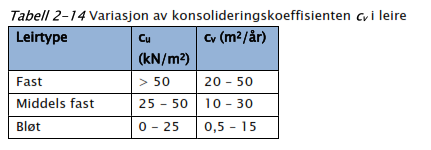

In [19]:
insar = pd.read_csv('insar-point.csv')
insar = insar.drop(insar.columns[[list(range(0,29))]], axis=1)
df = insar.transpose()
df.index = pd.to_datetime(df.index)

C:\Users\jan.aalbu\Anaconda3\envs\geohjelp\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<AxesSubplot:>

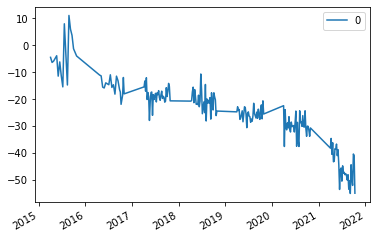

In [20]:
df.plot()

## Vurdering
Samanlikna med data fra Insar punkt, er det gunn til å tru at modultall ikkje kan være større enn 10-15. Tidsvurderinga gir at setningane vil minst pågå i 1-2 år, men meir sannsynleg er meir langvare setningar, som kan ta opptil 10 år å bli ferdige. Dette kjem an på tetthet og egenskap til leira.
![Snitt](snitt.png)

## Setningsforløp ved dybde

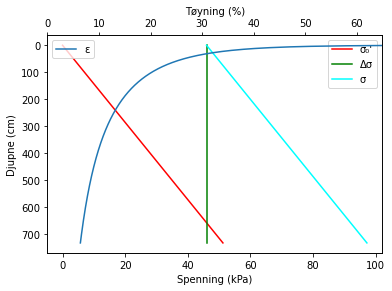

In [15]:
lagliste["hull6"].sett_stivhet(m=10)
profil6 = grunn.JordProfil([lagliste["hull6"]], u)
profil6.setning_uendelig(q)
profil6.plot_toyning()
plt.show()